In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
data['Geography'].groupby(data.Geography).count()

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
data['Gender'].groupby(data.Gender).count()

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

In [13]:
enc = OneHotEncoder(sparse = False)
categorical_features = [['France'], ['Germany'], ['Spain']]
enc.fit(categorical_features)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [14]:
transform = enc.transform(data['Geography'].to_numpy().reshape(-1, 1))

In [15]:
enc.get_feature_names()

array(['x0_France', 'x0_Germany', 'x0_Spain'], dtype=object)

In [17]:
new_state = pd.DataFrame(transform, columns = enc.get_feature_names())
new_data = pd.concat([data, new_state], axis=1).drop(['Geography'], axis = 1)
new_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,x0_France,x0_Germany,x0_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [26]:
enc = OneHotEncoder(sparse = False)
categorical_features = [['Female'], ['Male']]
enc.fit(categorical_features)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [28]:
transform = enc.transform(data['Gender'].to_numpy().reshape(-1, 1))
enc.get_feature_names()

array(['x0_Female', 'x0_Male'], dtype=object)

In [29]:
new_state = pd.DataFrame(transform, columns = enc.get_feature_names())
new_data = pd.concat([new_data, new_state], axis=1).drop(['Gender'], axis = 1)
new_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,x0_France,x0_Germany,x0_Spain,x0_Female,x0_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [31]:
y, x = new_data['Exited'], new_data.iloc[:, :].drop(columns=['Exited'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain,x0_Female,x0_Male
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,0.0,1.0


In [32]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42, shuffle=True)

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
model = Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [36]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
model.fit(x_train, y_train, batch_size = 64, epochs = 200)

Epoch 1/200
125/125 [==============================] - 1s 2ms/step - loss: 0.7107 - accuracy: 0.6140
Epoch 2/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.7879
Epoch 3/200
125/125 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7933
Epoch 4/200
125/125 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7995
Epoch 5/200
125/125 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8094
Epoch 6/200
125/125 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.8161
Epoch 7/200
125/125 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8195
Epoch 8/200
125/125 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8242
Epoch 9/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8321
Epoch 10/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3883 - accura

In [38]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [39]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

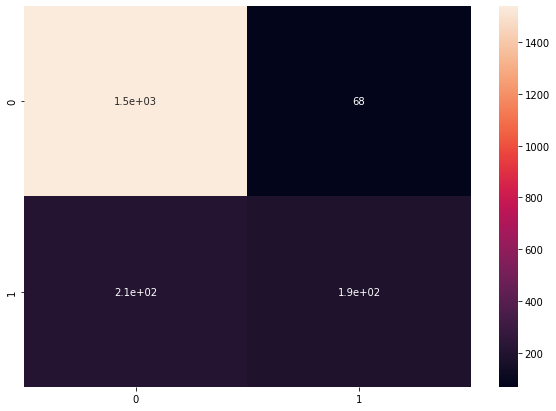

In [40]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Epoch 1/200
 72/125 [================>.............] - ETA: 0s - loss: 0.3346 - accuracy: 0.8663

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


125/125 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8687
Epoch 2/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8666
Epoch 3/200
125/125 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8673
Epoch 4/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8669
Epoch 5/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8670
Epoch 6/200
125/125 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8671
Epoch 7/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8684
Epoch 8/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8670
Epoch 9/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8680
Epoch 10/200
125/125 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8676
E

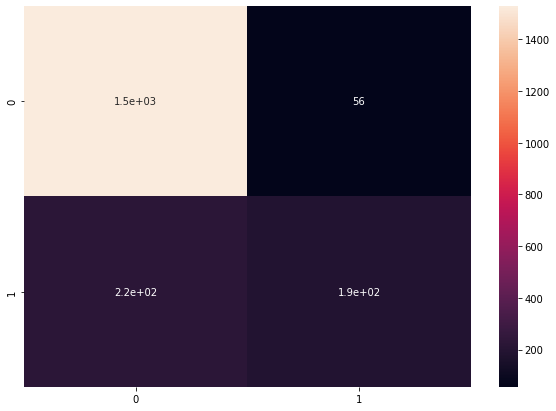

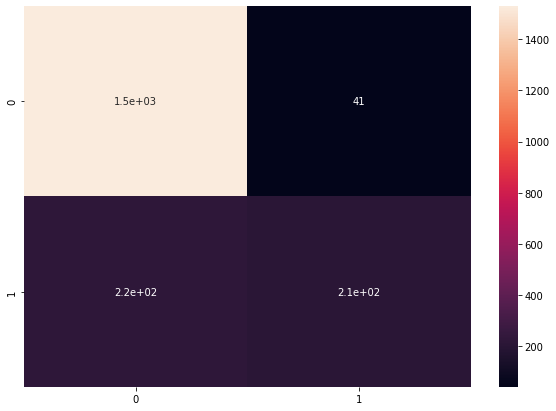

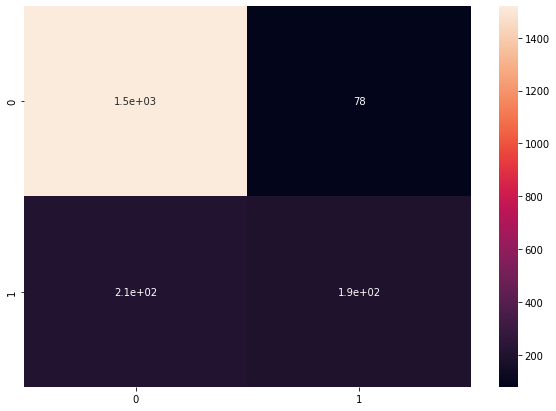

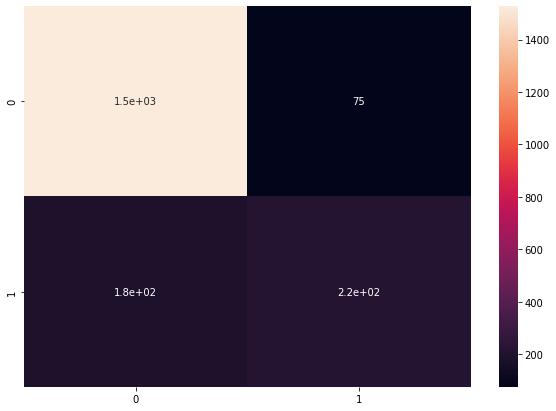

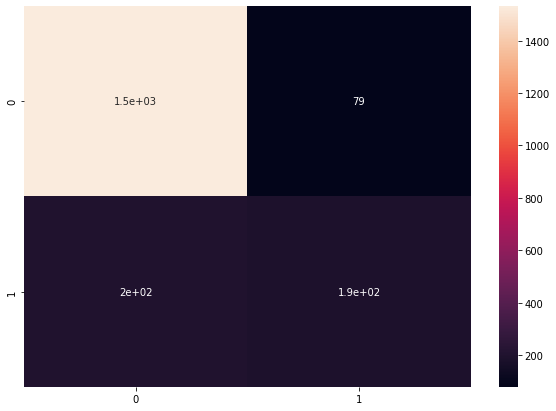

In [42]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False, random_state=42)
kf.get_n_splits(x)
report = []
for train_index, test_index in kf.split(x):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)
  model.fit(x_train, y_train, batch_size = 64, epochs = 200)
  y_pred = model.predict(x_test)
  y_pred = (y_pred > 0.5)
  cm = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(cm)
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True)
  report.append(classification_report(y_test, y_pred))
print(*report)